In [38]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import plot_confusion_matrix

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [39]:
#load the data file 
data = Path('clean_train.csv')
titanic_df = pd.read_csv(data)
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [40]:
# Segment the features from the target
X = titanic_df.drop("Survived", axis=1)
y = titanic_df['Survived']

In [41]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [42]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [43]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [44]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [45]:
# Creating the decision tree classifier instance
dt_model = tree.DecisionTreeClassifier()

In [46]:
# Fitting the model
dt_model = dt_model.fit(X_train_scaled, y_train)

In [47]:
# Making predictions using the testing data
predictions = dt_model.predict(X_test_scaled)

In [48]:
# Calculating the confusion matrix
dt_cm = confusion_matrix(y_test, predictions)
dt_cm_df = pd.DataFrame(
    dt_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [49]:
# Displaying results
print("Confusion Matrix")
display(dt_cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,109,34
Actual 1,17,63


Accuracy Score : 0.7713004484304933
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       143
           1       0.65      0.79      0.71        80

    accuracy                           0.77       223
   macro avg       0.76      0.77      0.76       223
weighted avg       0.79      0.77      0.78       223



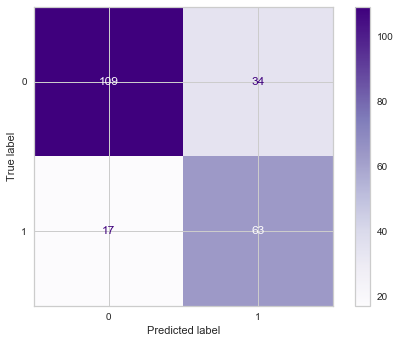

In [50]:
plot_confusion_matrix(dt_model, X_test_scaled, y_test, cmap = 'Purples')  


C:\Users\cjohn\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


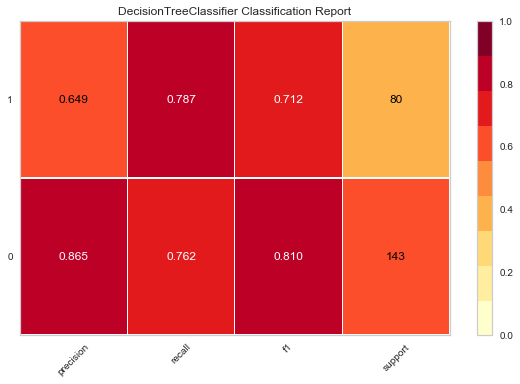

In [55]:
#visualize the classification report 
from yellowbrick.classifier import ClassificationReport

# Instantiate the classification model and visualizer
visualizer = ClassificationReport(dt_model, support=True)

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show()  

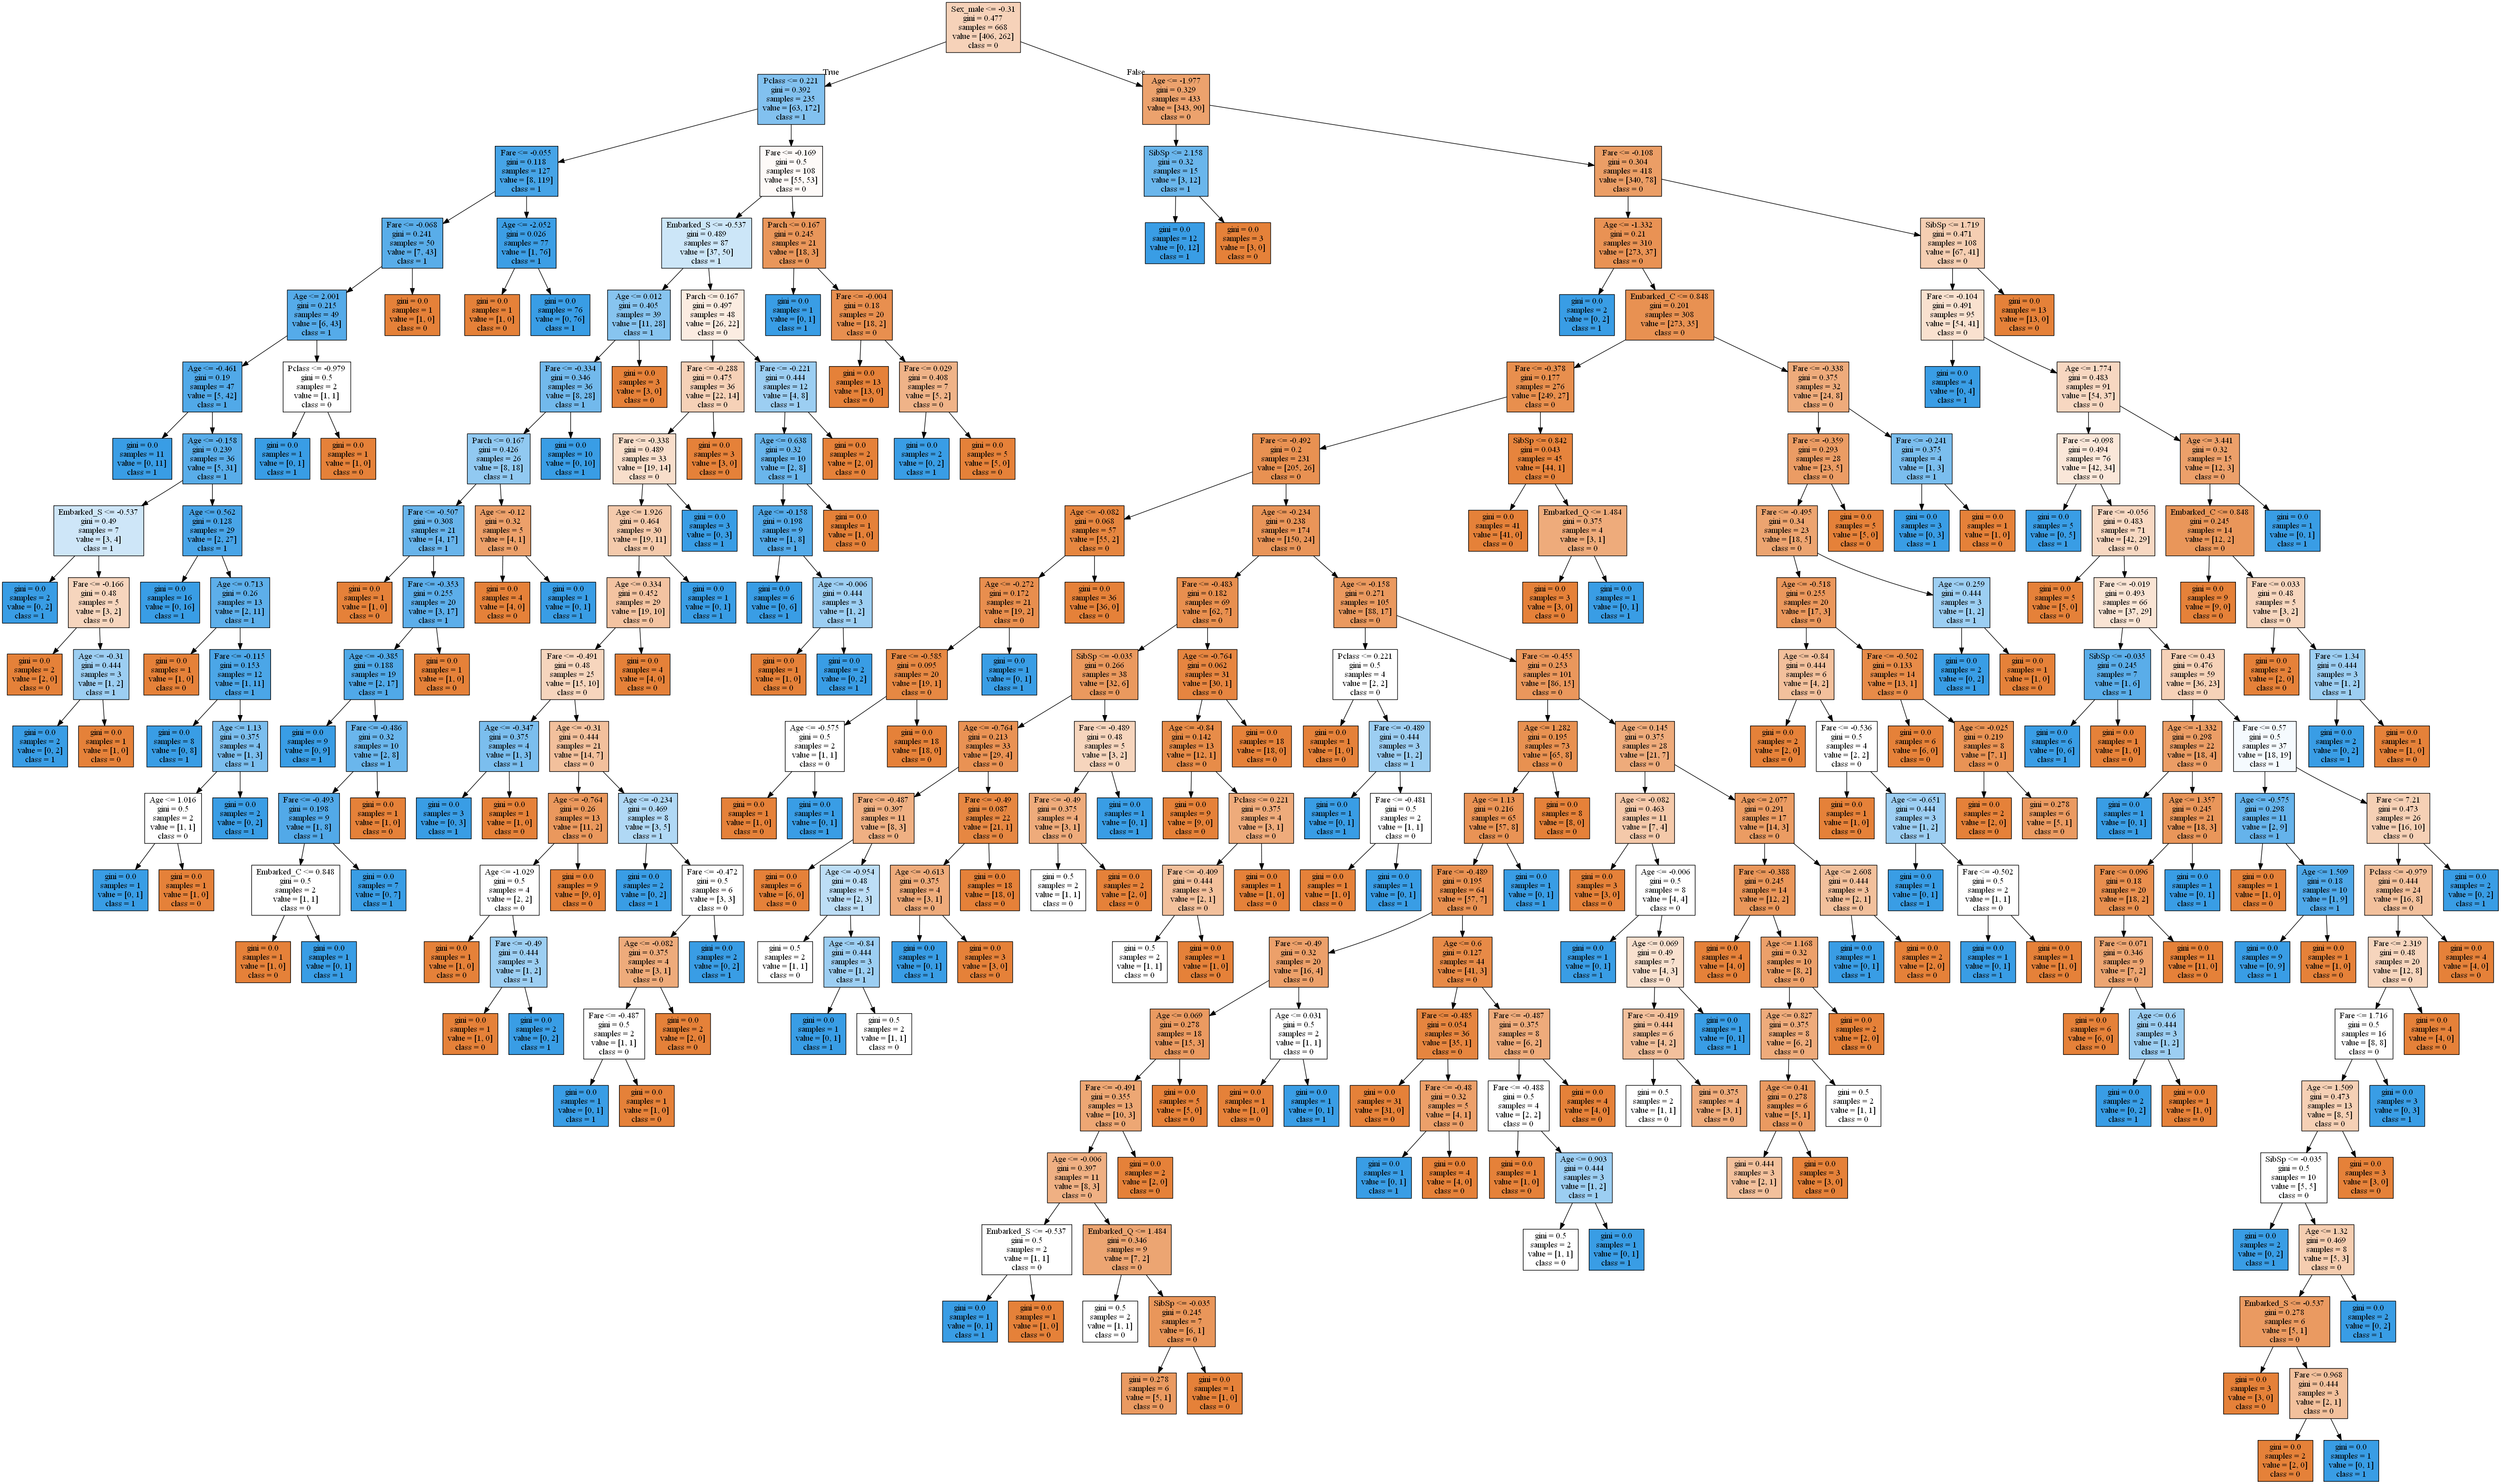

In [51]:
# Create DOT data
dot_data = tree.export_graphviz(
    dt_model, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

In [52]:
# Saving the tree as PNG
file_path = ("titanic_loans_tree.png")
graph.write_png(file_path)

True

C:\Users\cjohn\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


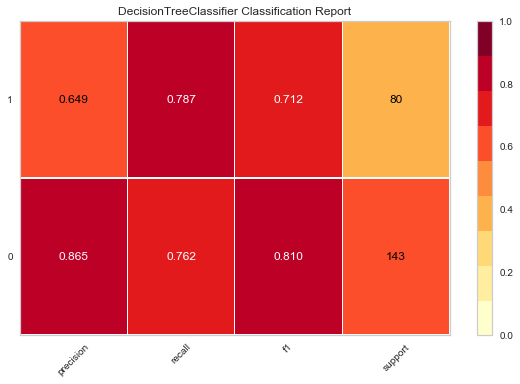